## Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
from pathlib import Path
import sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE, ADASYN

repo_root = Path.cwd().resolve().parent   # repo root when notebook is in 'notebooks'
sys.path.append(str(repo_root))

from src.data_modelling import train_model, evaluate_model, computeFeatureOutliers, LinearReg
from src.visualisation import importance_graph

df = pd.read_csv("../data/processed/loans_processed.csv", index_col=False)
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   credit.policy  int.rate  installment  log.annual.inc       dti      fico  \
0            1.0  0.004023     0.879888        0.544762  0.650200  0.104167   
1            1.0  0.003217     0.229916        0.506334  0.476969  0.079167   
2            1.0  0.005171     0.379883        0.404820  0.388184  0.058333   
3            1.0  0.002787     0.158653        0.544762  0.270360  0.083333   
4            1.0  0.005642     0.094378        0.537503  0.499666  0.045833   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0           0.312754   0.023898    0.077761        0.000000     0.000000   
1           0.147818   0.027848    0.114478        0.000000     0.000000   
2           0.259495   0.002908    0.038209        0.030303     0.000000   
3           0.144379   0.027885    0.109254        0.030303     0.000000   
4           0.222613   0.003926    0.058955        0.000000     0.076923   

   pub.rec  purpose_all_other  purpose_

In [2]:
X = df.drop('not.fully.paid',axis=1)
y = df['not.fully.paid']
smote = ADASYN(sampling_strategy='minority')
X, y = smote.fit_resample(X, y)
print(X.shape) #(15732,19)

(15732, 19)


In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

In [4]:
kmeans.fit(X)

KMeans(n_clusters=4)

In [5]:
kmeans.cluster_centers_

array([[ 7.78623582e-01,  4.83318524e-03,  3.71557872e-01,
         4.78552523e-01,  4.77938523e-01,  7.38478606e-02,
         2.45408950e-01,  1.44982510e-02,  8.34765092e-02,
         4.92083256e-02,  1.10093120e-02,  1.52530426e-02,
        -1.74860126e-15,  5.82867088e-16,  1.00000000e+00,
         9.50628465e-16, -1.69309011e-15,  1.38777878e-16,
        -1.80411242e-16],
       [ 7.41960581e-01,  4.36276223e-03,  2.50402502e-01,
         4.66840067e-01,  3.77660802e-01,  8.14436267e-02,
         2.28747951e-01,  1.16541480e-02,  6.49803504e-02,
         5.53515248e-02,  1.28478197e-02,  8.38849190e-03,
         1.00000000e+00, -2.53963517e-15, -2.77555756e-15,
         1.45716772e-16,  8.60422844e-16, -2.22044605e-16,
         2.08166817e-16],
       [ 7.68887472e-01,  4.24961687e-03,  3.02800207e-01,
         4.80115938e-01,  4.30511965e-01,  7.96277184e-02,
         2.47945734e-01,  1.47718097e-02,  7.17525028e-02,
         5.23801689e-02,  1.25319133e-02,  1.39975139e-02,
    

In [6]:
km = kmeans.labels_
km


array([0, 2, 0, ..., 0, 0, 0], dtype=int32)

In [7]:
df_km = pd.DataFrame(km, columns=['cluster'])
df_km

,cluster
0,0
1,2
2,0
3,0
4,2
...,...
15727,0
15728,0
15729,0
15730,0


In [8]:
df_final =  pd.concat([X, y, df_km], axis=1)
df_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,...,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,not.fully.paid,cluster
0,1.0,0.004023,0.879888,0.544762,0.650200,0.104167,0.312754,0.023898,0.077761,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
1,1.0,0.003217,0.229916,0.506334,0.476969,0.079167,0.147818,0.027848,0.114478,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2
2,1.0,0.005171,0.379883,0.404820,0.388184,0.058333,0.259495,0.002908,0.038209,0.030303,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
3,1.0,0.002787,0.158653,0.544762,0.270360,0.083333,0.144379,0.027885,0.109254,0.030303,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
4,1.0,0.005642,0.094378,0.537503,0.499666,0.045833,0.222613,0.003926,0.058955,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2


In [21]:
df_zero = df_final[df_final['cluster']==3]
df_zero.drop('cluster', axis=1, inplace=True)
df_zero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2302 entries, 8 to 15726
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               2302 non-null   float64
 1   int.rate                    2302 non-null   float64
 2   installment                 2302 non-null   float64
 3   log.annual.inc              2302 non-null   float64
 4   dti                         2302 non-null   float64
 5   fico                        2302 non-null   float64
 6   days.with.cr.line           2302 non-null   float64
 7   revol.bal                   2302 non-null   float64
 8   revol.util                  2302 non-null   float64
 9   inq.last.6mths              2302 non-null   float64
 10  delinq.2yrs                 2302 non-null   float64
 11  pub.rec                     2302 non-null   float64
 12  purpose_all_other           2302 non-null   float64
 13  purpose_credit_card         2302 non-

C:\Users\elena\AppData\Local\Temp\ipykernel_60884\2649308107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zero.drop('cluster', axis=1, inplace=True)


In [22]:
X = df_zero.loc[:, df.columns != 'not.fully.paid']
y= df_zero['not.fully.paid']

In [23]:
log_model, feature_names, X_test, y_test = train_model('XGBoost', X, y)

c:\Users\elena\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:22:13] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.82      0.80      0.81       187
           1       0.87      0.88      0.87       274

    accuracy                           0.85       461
   macro avg       0.84      0.84      0.84       461
weighted avg       0.85      0.85      0.85       461

[[150  37]
 [ 34 240]]
Accuracy: 0.8460
ROC AUC: 0.9351


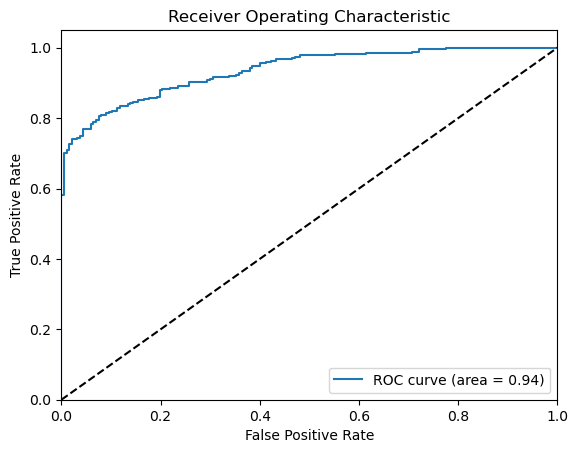

Default Threshold (0.5) Results:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       187
           1       0.87      0.88      0.87       274

    accuracy                           0.85       461
   macro avg       0.84      0.84      0.84       461
weighted avg       0.85      0.85      0.85       461

[[150  37]
 [ 34 240]]
Accuracy: 0.8460
ROC AUC: 0.9351


In [24]:
accuracy, roc_auc, class_report, conf_matrix = evaluate_model(log_model, X_test, y_test)
print("Default Threshold (0.5) Results:")
print(class_report)
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

